In [18]:
import numpy as np
import pandas as pd
import random
from random import randrange
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [173]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [60]:
empresas = pd.read_csv("dados_hackathon.csv")
transacoes = pd.read_csv("dados_transacionais_final.csv",sep=";")
base_transacoes_empresas = empresas.merge(transacoes, left_on='id', right_on='id_empresa', how='inner')
#base_transacoes_empresas

In [61]:
["equipamento", "material","entrega","energia","agua","internet","transporte","POS","transferencia","boleto","bandeira do cartao de credito"]
["janeiro","fevereiro","marco","abril","maio","junho","julho","agosto","outubro","novembro","dezembro"]
["credito","debito"]

base_transacoes_empresas["valor"]
for i in range(len(base_transacoes_empresas.iloc[0])):
    if base_transacoes_empresas["segmentos"].iloc[i] == "confeitaria" and base_transacoes_empresas["bairro"].iloc[i] == "vila olimpia":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 100,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "confeitaria" and  base_transacoes_empresas["bairro"].iloc[i] == "faria lima":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0,60,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "padaria" and base_transacoes_empresas["bairro"].iloc[i] == "itaquera":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0,30,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "padaria" and base_transacoes_empresas["bairro"].iloc[i] == "sao mateus":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 50,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "cafe" and base_transacoes_empresas["bairro"].iloc[i] == "sao mateus":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 10,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "cafe" and base_transacoes_empresas["bairro"].iloc[i] == "faria lima":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 20,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "lanchonete" and base_transacoes_empresas["bairro"].iloc[i] == "vila prudente":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 30,10)
    elif base_transacoes_empresas["segmentos"].iloc[i] == "lanchonete" and base_transacoes_empresas["bairro"].iloc[i] == "vila olimpia":
            base_transacoes_empresas["valor"].iloc[i] = random.triangular(1.0, 50,10)

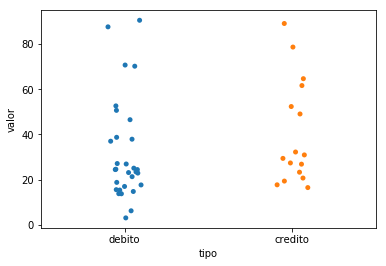

In [95]:
base_transacoes_empresas = base_transacoes_empresas.drop(["CNPJ","id_x","id_y","nome"],axis=1)


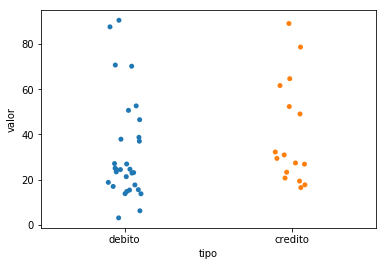

In [159]:
#teste com a empresa 1
b=base_transacoes_empresas[base_transacoes_empresas["id_empresa"]==4]
#segmentos,tipo,categoria, mes
sns.stripplot(x="tipo", y="valor",data=b,jitter=True)

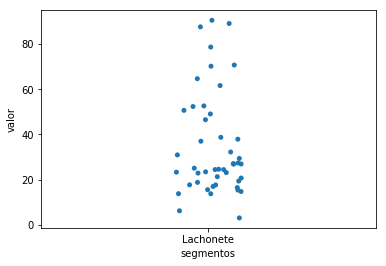

In [160]:
sns.stripplot(x="segmentos", y="valor",data=b,jitter=True)

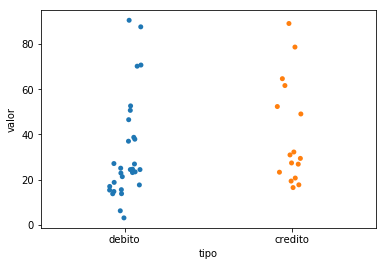

In [161]:
sns.stripplot(x="tipo", y="valor",data=b,jitter=True)

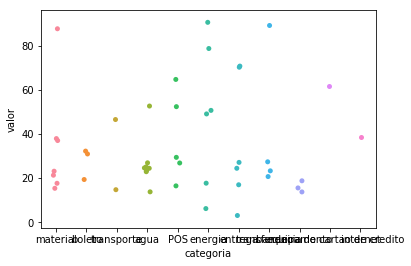

In [162]:
sns.stripplot(x="categoria", y="valor",data=b,jitter=True)

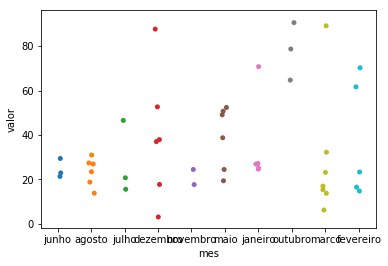

In [163]:
sns.stripplot(x="mes", y="valor",data=b,jitter=True)

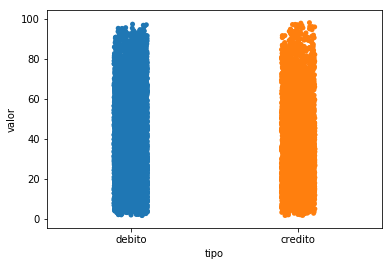

In [167]:
#teste com a empresa 2
b=base_transacoes_empresas[base_transacoes_empresas["segmentos"]=="Cafe"]
#segmentos,tipo,categoria, mes
sns.stripplot(x="tipo", y="valor",data=b,jitter=True)

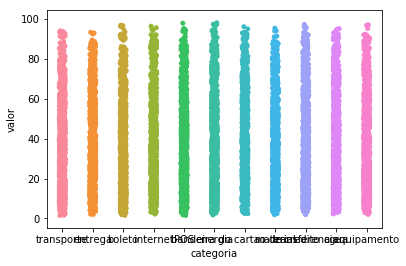

In [168]:
#segmentos,tipo,categoria, mes
sns.stripplot(x="categoria", y="valor",data=b,jitter=True)

In [189]:
base_transacoes_empresas

base_dummies  = base_transacoes_empresas.copy()
id_empresas = base_transacoes_empresas["id_empresa"]
valor = base_transacoes_empresas["valor"]
segmentos = pd.get_dummies(base_dummies['segmentos'],drop_first=True)
bairros = pd.get_dummies(base_dummies['bairros'],drop_first=True)
tipo = pd.get_dummies(base_dummies['tipo'],drop_first=True)
categoria = pd.get_dummies(base_dummies['categoria'],drop_first=True)
mes = pd.get_dummies(base_dummies['mes'],drop_first=True)

base_dummies.drop(['segmentos', 'bairros', 'id_empresa', 'valor', 'tipo', 'categoria','mes'], axis=1,inplace=True)
#base_dummies.drop(["GENERO","ESTADO_CIVIL","PERFIL"], axis=1,inplace=True)
base_dummies = pd.concat([base_dummies,id_empresas,segmentos,bairros,tipo,categoria,mes,valor],axis=1)
#base_dummies = pd.concat([base_dummies,genero,estado_civil,perfil],axis=1)
base_dummies.head()

,id_empresa,Confeitaria,Lachonete,Padaria,itaquera,sao mateus,vila olimpia,vila prudente,debito,agua,...,dezembro,fevereiro,janeiro,julho,junho,maio,marco,novembro,outubro,valor
0,1.0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,45.69
1,1.0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,21.60
2,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,56.65
3,1.0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,77.74
4,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,69.02


In [183]:
base_transacoes_empresas.columns

Index(['segmentos', 'bairros', 'id_empresa', 'valor', 'tipo', 'categoria',
       'mes'],
      dtype='object')

In [195]:
y = base_dummies["valor"]
X = base_dummies.drop(["valor"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [196]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
print(lm.intercept_)

37.01442298798767


In [199]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
id_empresa,0.000145
Confeitaria,-0.245683
Lachonete,0.085748
Padaria,0.531287
itaquera,0.469964
sao mateus,0.336506
vila olimpia,0.374576
vila prudente,0.285013
debito,-0.251427
agua,0.412860


In [200]:
predictions = lm.predict(X_test)

C:\Users\waleska.zanotto\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


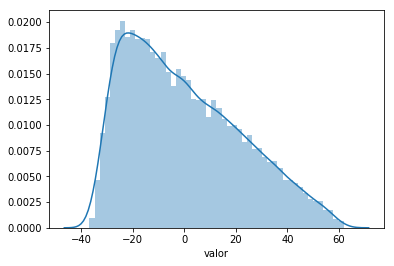

In [202]:
sns.distplot((y_test-predictions),bins=50);

In [203]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.629823190641705
MSE: 495.7221083018534
RMSE: 22.264817724424635


In [206]:
from sklearn.tree import DecisionTreeClassifier
y = base_transacoes_empresas["valor"]
X = base_transacoes_empresas.drop(["valor"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dtree = DecisionTreeClassifier()
#dtree.fit(X_train,y_train)
#sem resultados devido a necessidade de categorização da variável resposta